# Implementation of K-means, Hierarchical, DBScan and Spectral Clustering

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:\Users\User\Desktop\data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
cols_drop = ['id', 'Unnamed: 32']
data = data.drop(cols_drop, axis=1)
data['diagnonis'] = data['diagnosis'].map({'M':1,'B':0})
X = data.drop('diagnosis', axis=1).values
X = StandardScaler().fit_transform(X)


Text(0.5, 1.0, 'KMeans clustering plot')

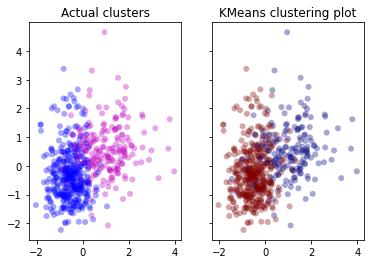

In [9]:
#1 KMeans Clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init="k-means++", n_init=8)
km_pred = km.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

Text(0.5, 1.0, 'Agglomeratve clustering plot')

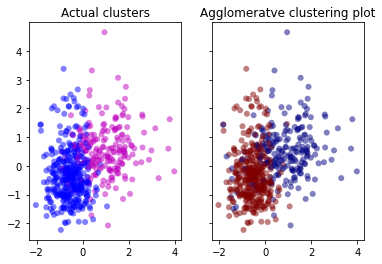

In [6]:
#2 Hierarchical Agglomerative Clustering 

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
ac_pred = ac.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=ac_pred, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("Agglomeratve clustering plot")

Text(0.5, 1.0, 'DBSCAN clustering plot')

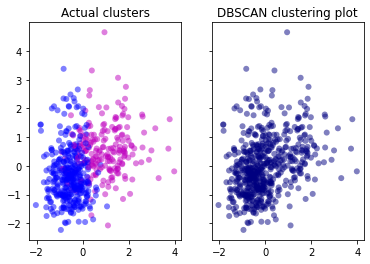

In [7]:
#3 DBSCAN (Density-Based Clustering of Applications with Noise)

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.2, min_samples=6)
dbs_pred = dbs.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=dbs_pred, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("DBSCAN clustering plot")

Text(0.5, 1.0, 'Spectral clustering plot')

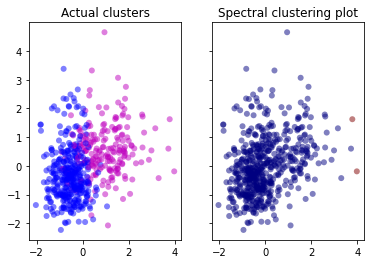

In [8]:
#4 Spectral Clustering

from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, gamma=0.5, affinity="rbf", assign_labels="discretize")
sc_pred = sc.fit_predict(X)

# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.5)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=sc_pred, cmap="jet", edgecolor="None", alpha=0.5)
ax2.set_title("Spectral clustering plot")